In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('customer_churn_dataset-training-master.csv', skiprows=1, skipfooter=1, engine='python')

In [79]:
df_test = pd.read_csv('customer_churn_dataset-testing-master.csv', skiprows=1, skipfooter=1, engine='python')

In [84]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

C:\Users\pokem\AppData\Local\Temp\ipykernel_24624\3169796494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [86]:
df = df[df['Age']!='Age']
df_test = df_test[df_test['Age']!='Age']

In [92]:
df_test.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)

C:\Users\pokem\AppData\Local\Temp\ipykernel_24624\2200913359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop_duplicates(inplace=True)


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerID         440832 non-null  object  
 1   Age                440832 non-null  int32   
 2   Gender             440832 non-null  category
 3   Tenure             440832 non-null  int32   
 4   Usage Frequency    440832 non-null  int32   
 5   Support Calls      440832 non-null  int32   
 6   Payment Delay      440832 non-null  int32   
 7   Subscription Type  440832 non-null  category
 8   Contract Length    440832 non-null  category
 9   Total Spend        440832 non-null  float64 
 10  Last Interaction   440832 non-null  int32   
 11  Churn              440832 non-null  object  
dtypes: category(3), float64(1), int32(6), object(2)
memory usage: 24.8+ MB


In [95]:
df['Age'] = df['Age'].astype(int)
df['Tenure'] = df['Tenure'].astype(int)
df['Usage Frequency'] = df['Usage Frequency'].astype(int)
df['Payment Delay'] = df['Payment Delay'].astype(int)
df['Last Interaction'] = df['Last Interaction'].astype(int)
df['Support Calls'] = df['Support Calls'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)
df_test['Tenure'] = df_test['Tenure'].astype(int)
df_test['Usage Frequency'] = df_test['Usage Frequency'].astype(int)
df_test['Payment Delay'] = df_test['Payment Delay'].astype(int)
df_test['Last Interaction'] = df_test['Last Interaction'].astype(int)
df_test['Support Calls'] = df_test['Support Calls'].astype(int)

df['Total Spend'] = df['Total Spend'].astype(float)
df_test['Total Spend'] = df_test['Total Spend'].astype(float)

df['Gender'] = df['Gender'].astype('category')
df['Subscription Type'] = df['Subscription Type'].astype('category')
df['Contract Length'] = df['Contract Length'].astype('category')
df_test['Gender'] = df_test['Gender'].astype('category')
df_test['Subscription Type'] = df_test['Subscription Type'].astype('category')
df_test['Contract Length'] = df_test['Contract Length'].astype('category')


C:\Users\pokem\AppData\Local\Temp\ipykernel_24624\3255709936.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'] = df_test['Age'].astype(int)
C:\Users\pokem\AppData\Local\Temp\ipykernel_24624\3255709936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Tenure'] = df_test['Tenure'].astype(int)
C:\Users\pokem\AppData\Local\Temp\ipykernel_24624\3255709936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerID         440832 non-null  object  
 1   Age                440832 non-null  int32   
 2   Gender             440832 non-null  category
 3   Tenure             440832 non-null  int32   
 4   Usage Frequency    440832 non-null  int32   
 5   Support Calls      440832 non-null  int32   
 6   Payment Delay      440832 non-null  int32   
 7   Subscription Type  440832 non-null  category
 8   Contract Length    440832 non-null  category
 9   Total Spend        440832 non-null  float64 
 10  Last Interaction   440832 non-null  int32   
 11  Churn              440832 non-null  object  
dtypes: category(3), float64(1), int32(6), object(2)
memory usage: 24.8+ MB


In [97]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         64374 non-null  object  
 1   Age                64374 non-null  int32   
 2   Gender             64374 non-null  category
 3   Tenure             64374 non-null  int32   
 4   Usage Frequency    64374 non-null  int32   
 5   Support Calls      64374 non-null  int32   
 6   Payment Delay      64374 non-null  int32   
 7   Subscription Type  64374 non-null  category
 8   Contract Length    64374 non-null  category
 9   Total Spend        64374 non-null  float64 
 10  Last Interaction   64374 non-null  int32   
 11  Churn              64374 non-null  object  
dtypes: category(3), float64(1), int32(6), object(2)
memory usage: 3.6+ MB


<AxesSubplot: xlabel='Churn', ylabel='Age'>

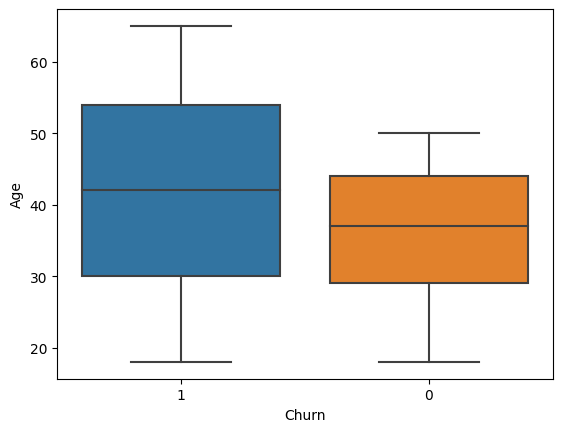

In [98]:
sns.boxplot(x='Churn', y='Age', data=df)

<AxesSubplot: xlabel='Churn', ylabel='Tenure'>

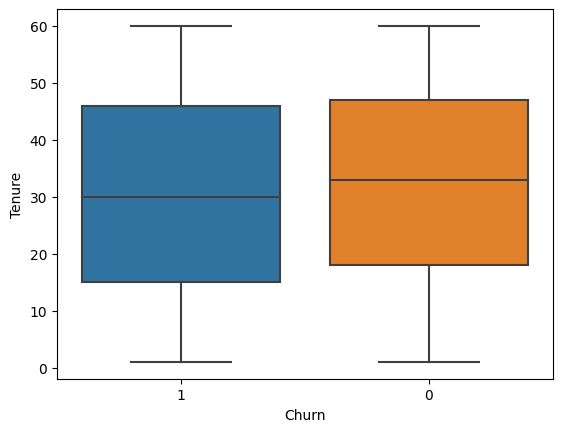

In [99]:
sns.boxplot(x='Churn', y='Tenure', data=df)

<AxesSubplot: xlabel='Churn', ylabel='Usage Frequency'>

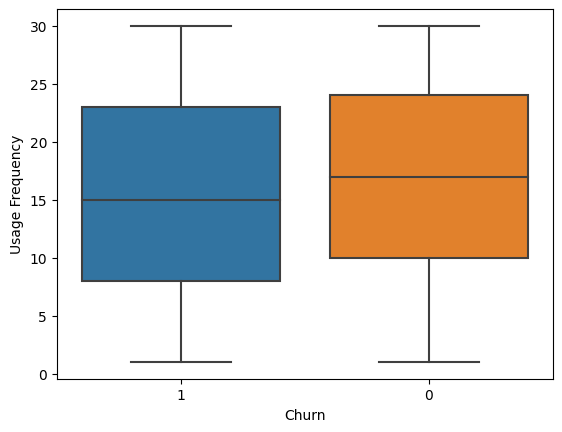

In [100]:
sns.boxplot(x='Churn', y='Usage Frequency', data=df)

<AxesSubplot: xlabel='Churn', ylabel='Payment Delay'>

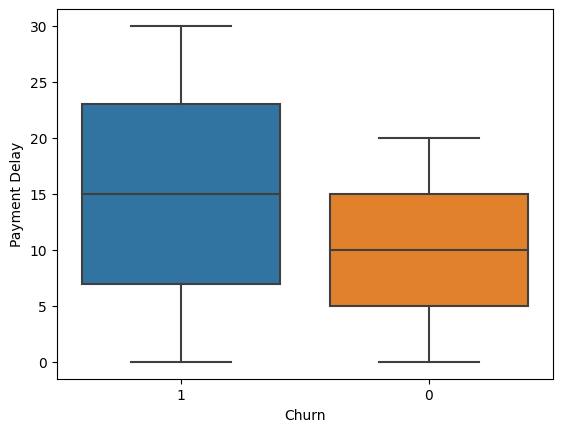

In [101]:
sns.boxplot(x='Churn', y='Payment Delay', data=df)

<AxesSubplot: xlabel='Churn', ylabel='Last Interaction'>

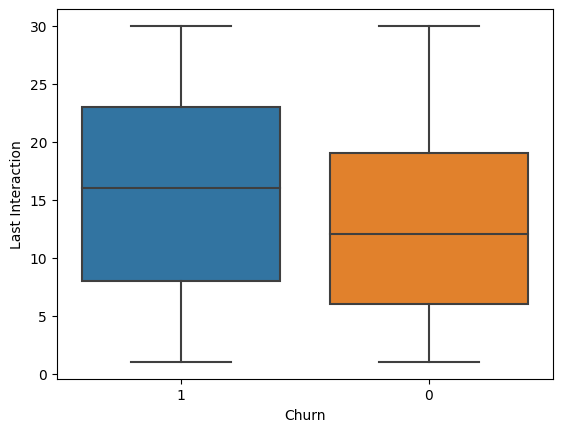

In [102]:
sns.boxplot(x='Churn', y='Last Interaction', data=df)

<AxesSubplot: xlabel='Churn', ylabel='Support Calls'>

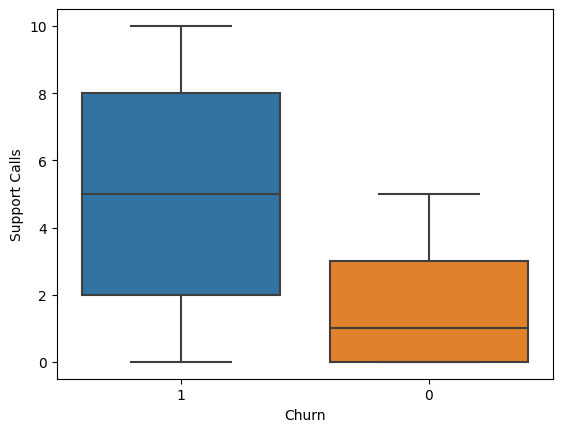

In [103]:
sns.boxplot(x='Churn', y='Support Calls', data=df)

<AxesSubplot: xlabel='Churn', ylabel='Total Spend'>

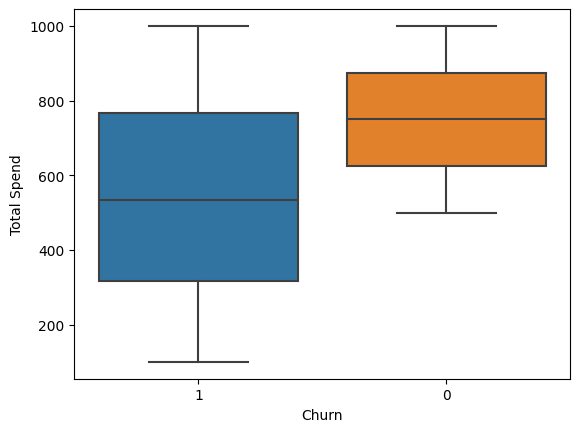

In [104]:
sns.boxplot(x='Churn', y='Total Spend', data=df)

c:\Users\pokem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\pokem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Gender', ylabel='count'>

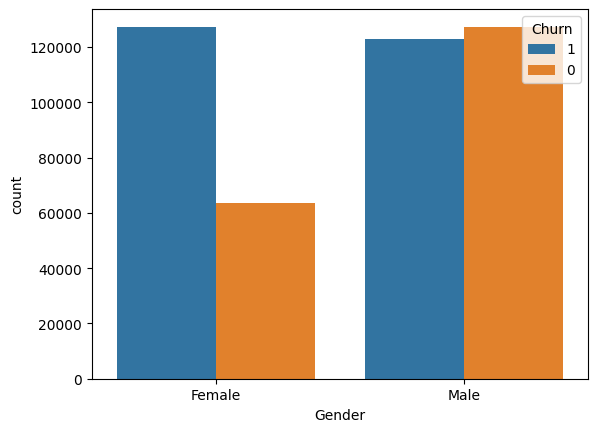

In [105]:
sns.countplot(x='Gender', data=df, hue='Churn')

c:\Users\pokem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Subscription Type', ylabel='count'>

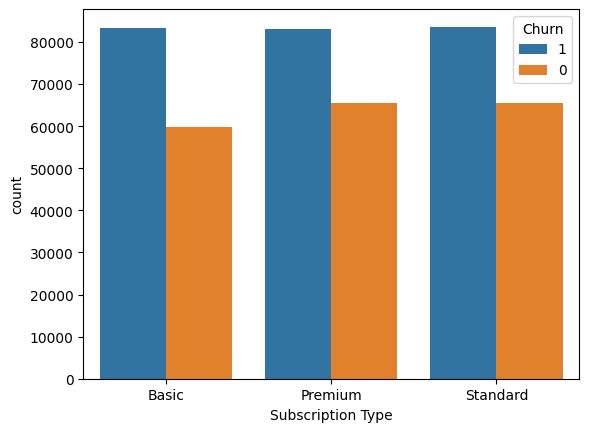

In [106]:
sns.countplot(x='Subscription Type', data=df, hue='Churn')

c:\Users\pokem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot: xlabel='Contract Length', ylabel='count'>

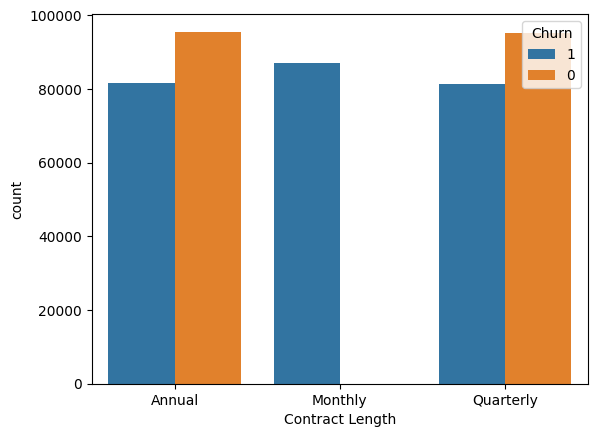

In [107]:
sns.countplot(x='Contract Length', data=df, hue='Churn')

### Visualization Summary

Main features that standout are:
- Age
- Payment Delay
- Support Calls
- Total Spend
- Gender
- Contract Length

In [ ]:
### statistical tests
# chi-square test (categorical features) x
# ANOVA x


### $\Chi^2$ test

Null hypothesis: The variables are independent (not related).

Alternative hypothesis: The variables are dependent (related).

if p_value < 0.05, then reject the null and state that the variables are related.

In [58]:
def chi_square_test(col='Gender',):
    # Create contingency table
    contingency_table = pd.crosstab(df[col], df['Churn'])

    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies:\n{expected}")

In [108]:
chi_square_test(col='Gender')

Chi-square statistic: 13560.734707741449
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[ 82500.71033863 108079.28966137]
 [108332.28966137 141919.71033863]]


In [109]:
chi_square_test(col='Subscription Type')

Chi-square statistic: 186.22514681615587
P-value: 3.6452152042998097e-41
Degrees of freedom: 2
Expected frequencies:
[[61914.92599902 81111.07400098]
 [64361.63611988 84316.36388012]
 [64556.4378811  84571.5621189 ]]


In [110]:
chi_square_test(col='Contract Length')

Chi-square statistic: 82862.39112987717
P-value: 0.0
Degrees of freedom: 2
Expected frequencies:
[[ 76707.7388529  100490.2611471 ]
 [ 37706.69468641  49397.30531359]
 [ 76418.56646069 100111.43353931]]


##### Summary
All variables reported very low p-values, suggesting that each is related to churn. However, the chi-square statistic for Subscription Type is low compared to the other two statistics. Even though the p-value is low, the low statistic may suggest that the null hypothesis is true.

### ANOVA

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif

In [111]:
X_train = df[df.columns[1:-1]]
X_train = pd.get_dummies(X_train)

X_test = df_test[df_test.columns[1:-1]]
X_test = pd.get_dummies(X_test)

y_train = df['Churn']
y_test = df_test['Churn']

In [112]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 22078.856215
Feature 1: 1191.503459
Feature 2: 938.889250
Feature 3: 216911.938445
Feature 4: 47583.534653
Feature 5: 99631.721502
Feature 6: 10093.907607
Feature 7: 13991.822434
Feature 8: 13991.822434
Feature 9: 185.803738
Feature 10: 54.049198
Feature 11: 37.694590
Feature 12: 14085.866014
Feature 13: 102042.679141
Feature 14: 14132.082136


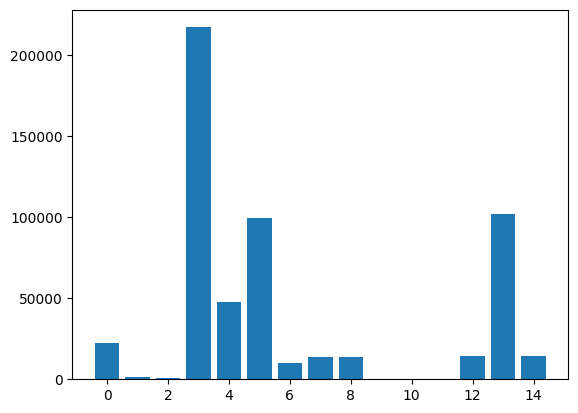

In [113]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [123]:
X_train.columns[[0, 3, 4, 5, 7, 8, 12, 13 ,14]]

Index(['Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Gender_Female',
       'Gender_Male', 'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

##### Summary

The results of this ANOVA f-test state that:
- Age
- Support Calls
- Payment Delay
- Total Spend 
- Gender
- Contract Length

are related to Churn. This is similar to the features selected when analyzed visually and the same categorical features from the $\Chi^2$ tests.

In [ ]:
### Clustering Methods
# kmeans
# spectral clustering
# hierarchical clustering
# density estimation